<a href="https://colab.research.google.com/github/putribuana/EpidermAI-SkinDetection/blob/main/EpidermAi_ISIC_Labelled_8Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EpidermAI Capstone Project**
This notebook builded up by machine learning team of EpidermAI project.


# Install All Module

In [ ]:
# Install Kaggle module
!pip install -q kaggle

# Install split-folders module
!pip install split-folders

# Kalo install modul taruh sini aja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import All Module

In [ ]:
import os
import shutil
import random
import pathlib
import splitfolders
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import lite
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.applications import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from google.colab import files

# Kalo import modul taruh sini aja

# Load Dataset
Dataset from Kaggle contain 25000 images of skin disease belonging to 8 classes.
This dataset is to facilitate image classification for 8 skin disease:

1.   Actinic keatosis
2.   Basal cell carcinoma
3.   Benign keratosis
4.   Dermatofibroma
5.   Melanocytic nevus
6.   Melanoma
7.   Squamous cell carcinoma
8.   Vascular lesion




## Get Data from Kaggle

In [ ]:
# Load data from Kaggle
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alamardiansyah","key":"4de1498ef16b5da5966b72d443d83511"}'}

In [ ]:
# Make sure kaggle.json succesfully uploaded
!ls

kaggle.json  sample_data


In [ ]:
# Make a directory named Kaggle and move kaggle.json to directory

!mkdir ~/.kaggle
!cp ./kaggle.json /root/.kaggle/

#Change permission of the file
!chmod 600 ~/.kaggle/kaggle.json

# Check the file if exist on directory
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          23082        645  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1268         31  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1201         34  1.0              
fatihb/coffee-quality-data-cqi

In [ ]:
# Download datasets
!kaggle datasets download -d riyaelizashaju/isic-skin-disease-image-dataset-labelled

100% 9.09G/9.10G [06:26<00:00, 25.3MB/s]
100% 9.10G/9.10G [06:26<00:00, 25.3MB/s]


## Unzip Data
Unzip isic-skin-disease-image-dataset-labelled.zip dataset

In [ ]:
# Unzip
!7za x "/content/isic-skin-disease-image-dataset-labelled.zip"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 9766946647 bytes (9315 MiB)

Extracting archive: /content/isic-skin-disease-image-dataset-labelled.zip
 16% 4096 Open              --
Path = /content/isic-skin-disease-image-dataset-labelled.zip
Type = zip
Physical Size = 9766946647
64-bit = +

  0%      0% 135 - ISIC_Labelled/Actinic keratosis/ISIC_0053595.jpg                                                             0% 178 - ISIC_Labelled/Actinic keratosis/ISIC_0054687.jpg                                      

In [ ]:
# make new directory name
old_labels = []
labels = []
for label in os.listdir('ISIC_Labelled'):
  if (label != 'Dermatofibroma'):
    old_labels.append(label)
    labels.append(label.lower().replace(' ', '_'))

print(old_labels)
print(labels)

['Squamous cell carcinoma', 'Vascular lesion', 'Basal cell carcinoma', 'Melanocytic nevus', 'Benign keratosis', 'Actinic keratosis', 'Melanoma']
['squamous_cell_carcinoma', 'vascular_lesion', 'basal_cell_carcinoma', 'melanocytic_nevus', 'benign_keratosis', 'actinic_keratosis', 'melanoma']


In [ ]:
# make copy each label in dataset
import shutil

if not os.path.exists('datasets'):
  os.mkdir('datasets')

old_base = 'ISIC_Labelled'
base = 'datasets'


# make new dirs
for label in labels:
  if not os.path.exists(os.path.join(base, label)):
    os.mkdir(os.path.join(base, label))

for dir in old_labels:
  target = 600
  x = 0
  for file in os.listdir(os.path.join(old_base, dir)):
    if( x >= target):
      break
    x += 1
    print(file)
    shutil.copyfile(os.path.join(os.path.join(old_base, dir), file), os.path.join(os.path.join(base, dir.lower().replace(' ', '_')), file))



ISIC_0031421.jpg
ISIC_0054265.jpg
ISIC_0024329.jpg
ISIC_0073088.jpg
ISIC_0071727.jpg
ISIC_0068203.jpg
ISIC_0058934.jpg
ISIC_0061263.jpg
ISIC_0057131.jpg
ISIC_0062662.jpg
ISIC_0055112.jpg
ISIC_0027700.jpg
ISIC_0064593.jpg
ISIC_0031211.jpg
ISIC_0063669.jpg
ISIC_0059952.jpg
ISIC_0069943.jpg
ISIC_0070041.jpg
ISIC_0060774.jpg
ISIC_0025696.jpg
ISIC_0053914.jpg
ISIC_0066781.jpg
ISIC_0027577.jpg
ISIC_0068842.jpg
ISIC_0071817.jpg
ISIC_0066787.jpg
ISIC_0061451.jpg
ISIC_0028232.jpg
ISIC_0064371.jpg
ISIC_0032371.jpg
ISIC_0024517.jpg
ISIC_0031198.jpg
ISIC_0071322.jpg
ISIC_0057224.jpg
ISIC_0030953.jpg
ISIC_0026981.jpg
ISIC_0026100.jpg
ISIC_0024522.jpg
ISIC_0059395.jpg
ISIC_0029932.jpg
ISIC_0056913.jpg
ISIC_0026992.jpg
ISIC_0058949.jpg
ISIC_0061240.jpg
ISIC_0060077.jpg
ISIC_0029563.jpg
ISIC_0024710.jpg
ISIC_0055218.jpg
ISIC_0055925.jpg
ISIC_0061937.jpg
ISIC_0057890.jpg
ISIC_0065491.jpg
ISIC_0032203.jpg
ISIC_0033869.jpg
ISIC_0031692.jpg
ISIC_0053457.jpg
ISIC_0057962.jpg
ISIC_0072347.jpg
ISIC_0030785.j

## Split Data
Split the dataset with a ratio of train 80% val 10% test 10%

In [ ]:
# Split data to train, validation, & test with ratio (80:10:10)
splitfolders.ratio(base, output="split_dataset",seed=1337, ratio=(.8, .15, .05))

Copying files: 3853 files [00:04, 811.75 files/s]


In [ ]:
# Check result of splitting dataset
!ls split_dataset

test  train  val


In [ ]:
# Check the number of images for each class in train directory
print("----- IMAGES FOR TRAINING -----")
for train_label in os.listdir('split_dataset/train'):
  dir = f"split_dataset/train/{train_label}"
  print(f"{len(os.listdir(dir))} images of {train_label}")

# Check the number of images for each class in val directory
print("\n----- IMAGES FOR VALIDATION -----")
for val_label in os.listdir('split_dataset/val'):
  dir = f"split_dataset/val/{val_label}"
  print(f"{len(os.listdir(dir))} images of {val_label}")

# Check the number of images for each class in test directory
print("\n----- IMAGES FOR TEST -----")
for test_label in os.listdir('split_dataset/test'):
  dir = f"split_dataset/test/{test_label}"
  print(f"{len(os.listdir(dir))} images of {test_label}")

----- IMAGES FOR TRAINING -----
480 images of squamous_cell_carcinoma
480 images of benign_keratosis
480 images of melanocytic_nevus
480 images of melanoma
480 images of actinic_keratosis
480 images of basal_cell_carcinoma
202 images of vascular_lesion

----- IMAGES FOR VALIDATION -----
90 images of squamous_cell_carcinoma
90 images of benign_keratosis
90 images of melanocytic_nevus
90 images of melanoma
90 images of actinic_keratosis
90 images of basal_cell_carcinoma
37 images of vascular_lesion

----- IMAGES FOR TEST -----
30 images of squamous_cell_carcinoma
30 images of benign_keratosis
30 images of melanocytic_nevus
30 images of melanoma
30 images of actinic_keratosis
30 images of basal_cell_carcinoma
14 images of vascular_lesion


# **Configuration**

In [ ]:
train_dir = "split_dataset/train"
val_dir = "split_dataset/val"
test_dir = "split_dataset/test"
img_size = 200

## Plotting Data

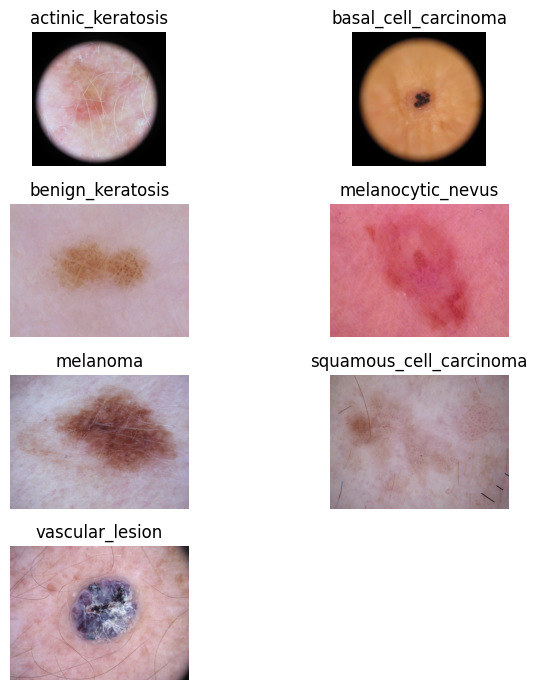

In [ ]:
# Takes the class name from the folder name
class_names = sorted(os.listdir(train_dir))

# Plot some sample images from the data train
plt.figure(figsize=(7, 7))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    image = plt.imread(image_path)

    plt.subplot(4, 2, i+1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()


# Image Data Generator

Preprocessing the image before training with model. The images have a resolution **1024x1024** and resized to **256x256**.

In [ ]:
def train_val_generators(train_dir, val_dir):
  """
  Creates the training and validation data generators
  """
  # Instantiate the ImageDataGenerator class for training
  # Normalize pixel value
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=20)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=30,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(150,150))

  # Instantiate the ImageDataGenerator class for validation
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=30,
                                                                shuffle=True,
                                                                class_mode='categorical',
                                                                target_size=(150,150))
  return train_generator, validation_generator

In [ ]:
# Test the function above
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 3082 images belonging to 7 classes.
Found 577 images belonging to 7 classes.


# Create Model

In [ ]:
def create_model():
  """
  create the model using CNN
  """
  # Define model
  # untuk layer ini cuma ngasal, belum aku training
  model = Sequential([
      # First convolution
      Conv2D(64, (3,3), activation='relu', input_shape=(img_size, img_size, 3), padding='Same'),
      MaxPooling2D(2,2),
      # Second convolution
      Conv2D(128, (3,3), activation='relu', padding='Same'),
      MaxPooling2D(2,2),
      # Flatten layer
      # Flatten(),
      tf.keras.layers.GlobalAveragePooling2D(),
      # Hidden layer (1024)
      Dense(1024, activation='relu'),
      # Output layer
      Dense(7, activation='softmax')
  ])

  return model

In [ ]:
# Save model
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# **Adjusting The Learning Rate**

In [ ]:
lr = ReduceLROnPlateau(monitor='val_accuracy',
                       patience=5,
                       verbose=1,
                       factor=0.3,
                       min_lr=0.05)

## **Train Model**

In [ ]:
EPOCHS = 30

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[lr])

Epoch 1/30
103/103 [==============================] - 90s 747ms/step - loss: 1.9123 - accuracy: 0.1742 - val_loss: 1.8788 - val_accuracy: 0.2062 - lr: 0.0010
Epoch 2/30
103/103 [==============================] - 76s 736ms/step - loss: 1.8716 - accuracy: 0.2112 - val_loss: 1.8602 - val_accuracy: 0.1976 - lr: 0.0010
Epoch 3/30
103/103 [==============================] - 77s 745ms/step - loss: 1.8325 - accuracy: 0.2317 - val_loss: 1.8325 - val_accuracy: 0.2478 - lr: 0.0010
Epoch 4/30
103/103 [==============================] - 76s 733ms/step - loss: 1.8021 - accuracy: 0.2709 - val_loss: 1.7930 - val_accuracy: 0.2409 - lr: 0.0010
Epoch 5/30
103/103 [==============================] - 76s 736ms/step - loss: 1.7560 - accuracy: 0.2794 - val_loss: 1.7207 - val_accuracy: 0.2738 - lr: 0.0010
Epoch 6/30
103/103 [==============================] - 76s 737ms/step - loss: 1.7217 - accuracy: 0.2988 - val_loss: 1.7247 - val_accuracy: 0.2877 - lr: 0.0010
Epoch 7/30
103/103 [==============================] 

Look the training history:

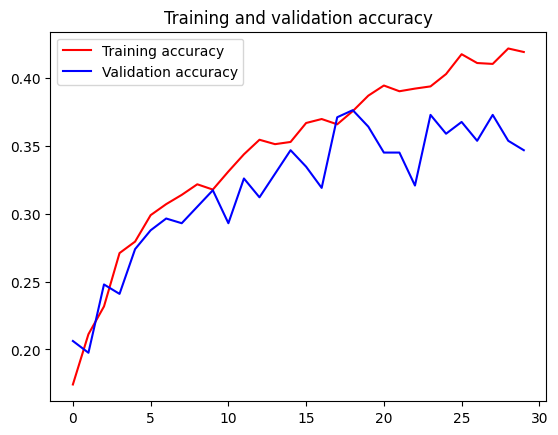

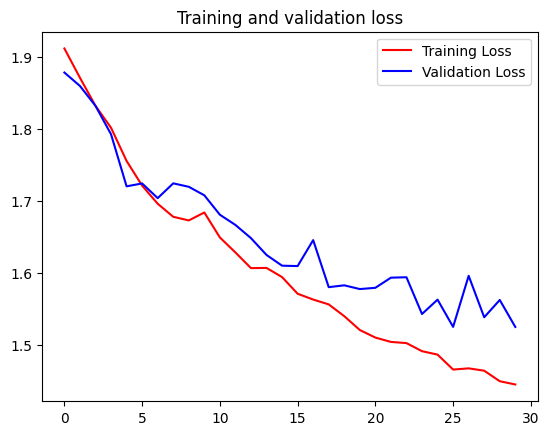

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model Prediction
Use test set for predict the model (5% of dataset)

/content/split_dataset/test/Basal cell carcinoma/ISIC_0030335.jpg


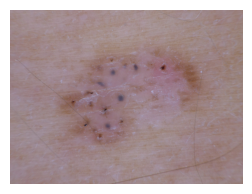

1/1 [==============================] - 0s 194ms/step
10.62% chance to be AK
13.31% chance to be BCC
29.84% chance to be BK
0.42% chance to be DF
11.97% chance to be MN
7.80% chance to be MEL
25.33% chance to be SCC
0.71% chance to be VL

/content/split_dataset/test/Vascular lesion/ISIC_0027210.jpg


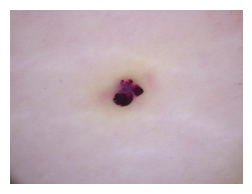

1/1 [==============================] - 0s 19ms/step
0.00% chance to be AK
0.56% chance to be BCC
16.61% chance to be BK
0.01% chance to be DF
9.34% chance to be MN
1.52% chance to be MEL
0.00% chance to be SCC
71.97% chance to be VL

/content/split_dataset/test/Benign keratosis/ISIC_0070742.jpg


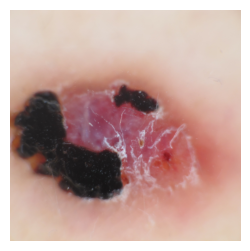

1/1 [==============================] - 0s 18ms/step
0.00% chance to be AK
31.19% chance to be BCC
1.28% chance to be BK
0.00% chance to be DF
4.33% chance to be MN
60.75% chance to be MEL
0.93% chance to be SCC
1.52% chance to be VL

/content/split_dataset/test/Melanoma/ISIC_0062102.jpg


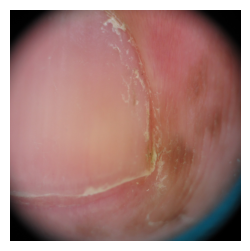

1/1 [==============================] - 0s 19ms/step
58.05% chance to be AK
6.57% chance to be BCC
4.28% chance to be BK
0.00% chance to be DF
4.44% chance to be MN
26.32% chance to be MEL
0.34% chance to be SCC
0.00% chance to be VL

/content/split_dataset/test/Squamous cell carcinoma/ISIC_0066030.jpg


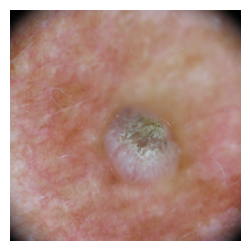

1/1 [==============================] - 0s 18ms/step
6.28% chance to be AK
3.92% chance to be BCC
75.04% chance to be BK
0.20% chance to be DF
3.57% chance to be MN
10.21% chance to be MEL
0.77% chance to be SCC
0.01% chance to be VL



In [ ]:
# Test 5 images
for i in range(5):
  # Get test directory
  test_dir = '/content/split_dataset/test/'

  # Pick 1 random label directory on test directory
  random_label = test_dir + random.choice(os.listdir(test_dir)) + '/'

  # Pick 1 random image on random_label directory (i.e Melanoma)
  random_images = random_label + random.choice(os.listdir(random_label))

  # Check which image was choosen
  print(random_images)

  # Show Image was selected
  plt.figure(figsize=(3, 3))
  image = plt.imread(random_images)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

  # Set path to be equal to random_images
  path = random_images

  # Load images and convert to array
  img = load_img(path, target_size=(128, 128))
  x = img_to_array(img)

  # Normalize, expand dimension, and stack array vertically of images
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # Predict images using model.predict
  classes = model.predict(images, batch_size=10)

  # Define label of disease with acronym
  labels = ['AK', 'BCC', 'BK', 'DF', 'MN', 'MEL', 'SCC', 'VL']

  # Iterate classes[0] to get the predicted value
  for i, value in enumerate(classes[0]):
    # Format value to percent(%)
    predict = format(value * 100, ".2f")

    # Get label
    label = labels[i]

    # Prediction result
    print(f"{predict}% chance to be {label}")
  print()

# Image Prediction

In [ ]:
# uploaded = files.upload()

# for fn in uploaded.keys():
#   path = fn
#   img = tf.keras.utils.load_img(path, target_size =(150,150))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)

#   print(fn)
#   print(classes)

In [ ]:
print(train_dir)

# **Exporting to TFLite**

In [ ]:
# Save model in the SavedModel format
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

In [ ]:
optimization = [lite.Optimize.DEFAULT]

In [ ]:
# Convert saved model API
converter = lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimizations
converter.optimizations = optimization

# Invoke to generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)